In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit
from scipy import stats
import pickle
import pandas as pd

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)
plt.style.use('seaborn')

In [30]:
# open the file of interest, and use pickle loading
infile = open ("qcd_100000_pt_1000_1200.pkl",'rb')
background_dict = pickle.load(infile)

# open the file of interest, and use pickle loading
infile = open ("higgs_100000_pt_1000_1200.pkl",'rb')
signal_dict = pickle.load(infile)

# list all keys of the files
keys = background_dict.keys()

### Mass

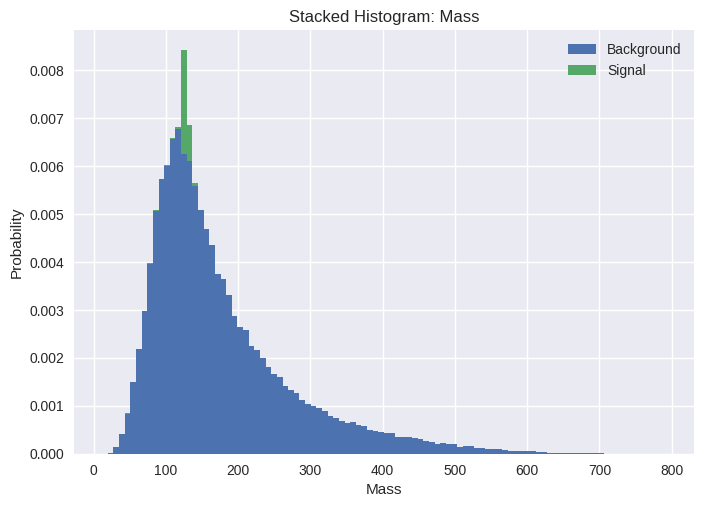

In [4]:
fig, ax = plt.subplots(1,1)

bkg_mass = background_dict['mass']
sig_mass = signal_dict['mass']

data = [bkg_mass, sig_mass]

bkg_weight = np.array([2000]*len(bkg_mass))
sig_weight = np.array([50]*len(sig_mass))

a = ax.hist(data, bins=100, density=True, stacked=True, weights=[bkg_weight, sig_weight], label=["Background", "Signal"])

ax.set_xlabel("Mass")
ax.set_ylabel("Probability")
ax.set_title("Stacked Histogram: Mass")

plt.legend(loc=0)
plt.show()

In [5]:
expected_sig = stats.poisson.cdf(2050, 2000, loc=0)
expected_sig

0.8703871254450806

In [6]:
n_higgs = 50
n_qcd = 2000

sig = n_higgs / np.sqrt(n_qcd)
sig

1.118033988749895

In [7]:
bins = 100
bkd_hist = ax.hist(bkg_mass, bins, range=[0,round(a[1][-1])], weights=bkg_weight / 100000)
sig_hist = ax.hist(sig_mass, bins, range=[0,round(a[1][-1])], weights=sig_weight / 100000)

In [8]:
expected_sig = []
for i in range(bins):
    qcd = bkd_hist[0][i] 
    higgs = sig_hist[0][i] 
    prob = stats.poisson.cdf(qcd+higgs, qcd, loc=0)
    expected_sig.append(stats.norm.ppf(prob, loc=0, scale=1))

expected_sig = np.array(expected_sig)
expected_sig[np.isinf(expected_sig)] = 0

expected_sig

array([ 0.00000000e+00,  2.05786959e+00,  1.30961780e+00,  6.07986479e-01,
        1.28652803e-01, -9.30195439e-02,  1.38658957e-01,  1.15921413e-01,
        1.02737055e-01,  1.92176436e-02,  2.36622805e-02,  2.62519661e-02,
        5.16588312e-02,  4.96360886e-02,  1.10338570e-01,  2.13379193e+00,
        2.31695719e+00,  2.87828124e-01,  2.48370862e-02, -1.27480408e-02,
        1.73761470e-02, -1.16576550e-02,  1.38666189e-02,  5.02426196e-02,
        6.82552653e-03, -3.82189168e-02, -2.36675631e-02,  3.05736376e-02,
       -3.27046446e-02,  1.01889019e-01,  5.66742600e-02,  1.20310323e-01,
        1.06850287e-01, -1.52220418e-02,  1.45519706e-02,  4.58860581e-02,
        8.58042352e-02,  2.15930696e-02,  7.10367171e-02,  8.87179433e-02,
        1.78207473e-02, -4.81498702e-02,  1.74092244e-01,  1.93916112e-01,
        1.84098761e-01, -5.84280018e-02,  3.51969103e-02,  1.27099915e-01,
       -1.83526385e-02,  3.24729474e-02,  8.39313601e-02, -1.11303015e-01,
       -1.17887288e-02,  

In [9]:
index = np.where(expected_sig == np.max(expected_sig))[0][0]
bkd_hist[1][index]

126.72

In [10]:
expected_sig[index]

2.3169571858644566

### Other Features

Plots plots plots

In [11]:
keys

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

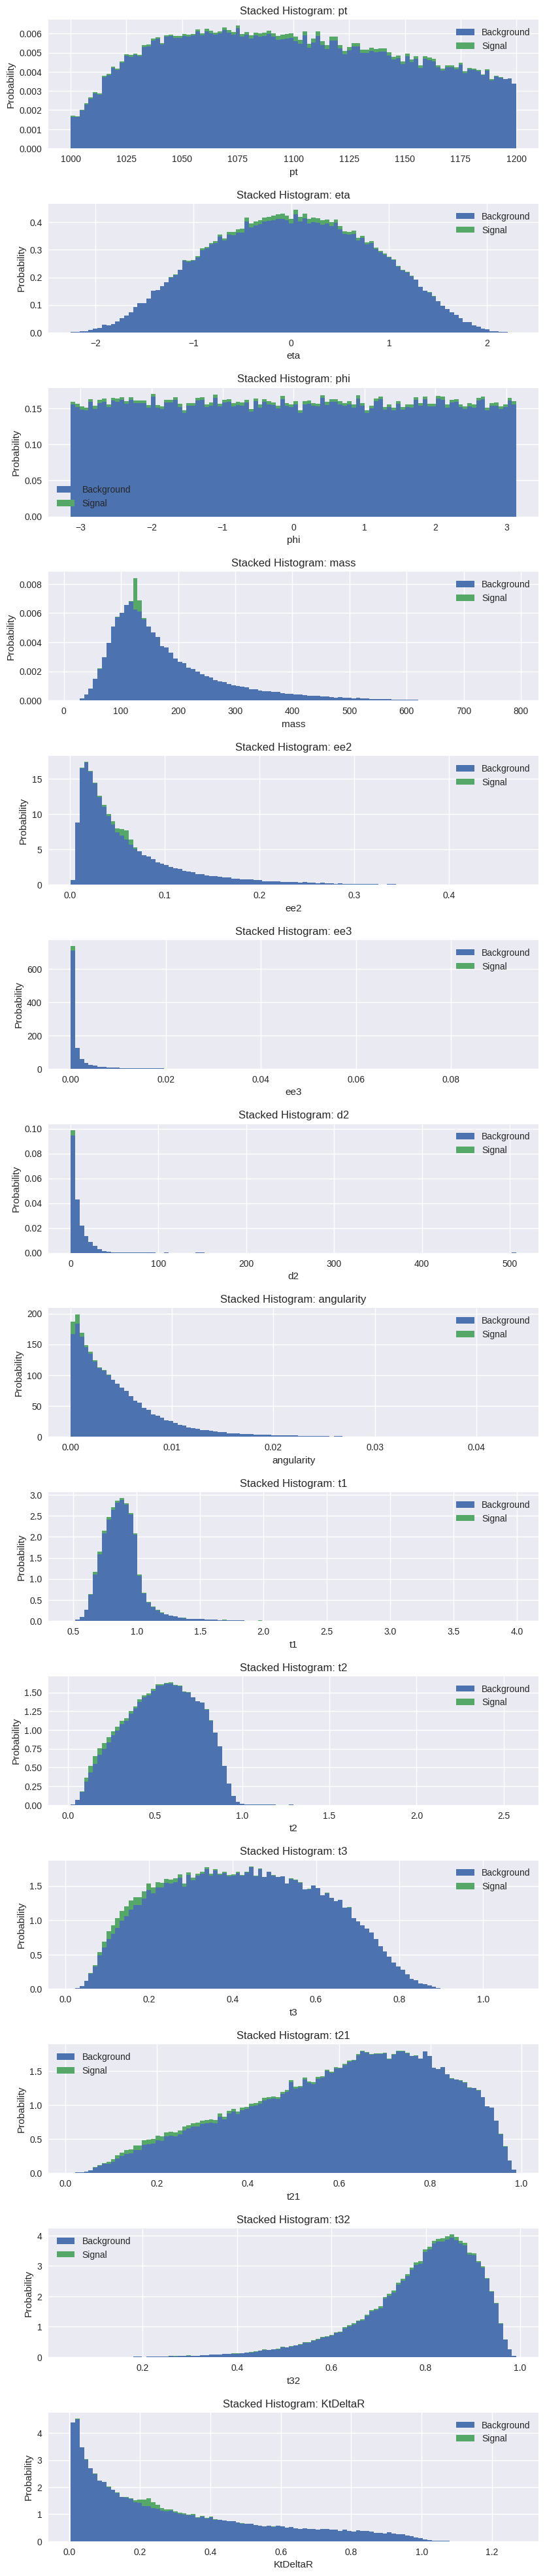

In [12]:
fig, ax = plt.subplots(len(keys), 1, figsize=(9,40))
fig.tight_layout(pad=4)

for i in range(len(keys)):

    bkg_i = background_dict[keys[i]]
    sig_i = signal_dict[keys[i]]

    data = [bkg_i, sig_i]
    
    bkg_weight = np.array([2000]*len(bkg_i))
    sig_weight = np.array([50]*len(sig_i))

    a = ax[i].hist(data, bins=100, density=True, stacked=True, weights=[bkg_weight, sig_weight], label=["Background", "Signal"])

    ax[i].set_xlabel(keys[i])
    ax[i].set_ylabel("Probability")
    ax[i].set_title("Stacked Histogram: "+str(keys[i]))

    ax[i].legend(loc=0)
plt.show()

In [13]:
bins = 100
expected_sig_array = np.zeros([len(keys), bins])
max_index = np.zeros(len(keys))
bkg_hist = np.zeros([len(keys), bins])

for i in range(len(keys)):
    bkg_i = background_dict[keys[i]]
    sig_i = signal_dict[keys[i]]

    data = [bkg_i, sig_i]
    a = plt.hist(data, bins=100, density=True, stacked=True, weights=[bkg_weight, sig_weight], label=["Background", "Signal"])
    
    bkg_hist_i = plt.hist(bkg_i, bins, range=[0,round(a[1][-1])], weights=bkg_weight / 100000)
    sig_hist_i = plt.hist(sig_i, bins, range=[0,round(a[1][-1])], weights=sig_weight / 100000)
    
    for j in range(bins):
        qcd = bkg_hist_i[0][j]
        higgs = sig_hist_i[0][j]
        prob = stats.poisson.cdf(qcd+higgs, qcd, loc=0)
        expected_sig = stats.norm.ppf(prob, loc=0, scale=1)
        expected_sig_array[i][j] = expected_sig
        
        expected_sig_array[np.isinf(expected_sig_array)] = 0
        
    max_index = np.where(expected_sig_array[i] == np.max(expected_sig_array[i]))[0][0]
        
    print(str(keys[i])+": Highest sig "+str(round(expected_sig_array[i][max_index],2))+
          ", Location "+str(round(bkg_hist_i[1][max_index],2))+", Index "+str(max_index))
    
    plt.close()

pt: Highest sig 0.48, Location 1104.0, Index 92
eta: Highest sig 0.5, Location 1.88, Index 94
phi: Highest sig 0.3, Location 0.99, Index 33
mass: Highest sig 2.32, Location 126.72, Index 16
ee2: Highest sig 2.06, Location 0.47, Index 97
ee3: Highest sig 2.06, Location 0.08, Index 58
d2: Highest sig 2.06, Location 86.36, Index 17
angularity: Highest sig 1.43, Location 0.04, Index 54
t1: Highest sig 2.06, Location 0.44, Index 11
t2: Highest sig 2.06, Location 1.35, Index 45
t3: Highest sig 2.06, Location 0.93, Index 93
t21: Highest sig 1.43, Location 0.01, Index 1
t32: Highest sig 2.06, Location 0.04, Index 4
KtDeltaR: Highest sig 1.13, Location 0.22, Index 22


The highest signficiance was mass with a value of 2.32. Didn't tell me much about where to look, and none of the significances were particularly high.

In [14]:
bkg_hist_i

(array([ 36.68, 115.86,  87.38,  72.54,  62.18,  58.6 ,  52.12,  51.76,
         46.48,  43.88,  42.04,  41.56,  39.1 ,  36.04,  35.06,  34.18,
         31.64,  32.08,  29.9 ,  28.52,  28.48,  27.08,  25.72,  25.52,
         25.48,  23.7 ,  23.06,  22.6 ,  23.18,  22.42,  21.  ,  20.64,
         20.4 ,  19.98,  19.7 ,  19.18,  17.9 ,  18.6 ,  17.66,  17.8 ,
         17.66,  16.18,  16.  ,  16.  ,  15.7 ,  14.7 ,  15.44,  14.8 ,
         13.56,  12.78,  13.44,  13.46,  12.34,  12.22,  11.68,  11.1 ,
         11.52,  11.68,  11.26,  11.24,  11.54,  10.66,  10.6 ,  10.6 ,
          9.66,   9.16,   9.56,   9.46,   8.9 ,   9.64,   8.86,   8.78,
          9.64,   9.1 ,   8.94,   8.78,   7.82,   8.26,   8.72,   7.84,
          7.5 ,   7.98,   7.46,   8.04,   7.74,   7.02,   6.98,   6.24,
          6.52,   6.06,   6.28,   6.1 ,   5.82,   5.18,   5.04,   4.56,
          4.6 ,   3.2 ,   3.08,   2.78]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 

Varying the bin size

In [15]:
a[1][-1]

1.268861790843722

In [ ]:
bin_array = np.arange(1,101)
expected_sig_array = np.zeros([len(keys), len(bin_array)])
max_index = np.zeros(len(keys))
# bkg_hist = np.zeros([len(keys), bins])

max_sig_array = np.zeros([len(bin_array), len(keys)])
max_location_array = np.zeros([len(bin_array), len(keys)])

for k in range(len(bin_array)):
    bins = bin_array[k]
    print(bins)

    for i in range(len(keys)):

        print(i)
        bkg_i = background_dict[keys[i]]
        sig_i = signal_dict[keys[i]]

        data = [bkg_i, sig_i]
        a = plt.hist(data, bins, density=True, stacked=True, weights=[bkg_weight, sig_weight], label=["Background", "Signal"])

        bkg_hist_i = plt.hist(bkg_i, bins, range=[0,round(a[1][-1])], weights=bkg_weight / 100000)
        sig_hist_i = plt.hist(sig_i, bins, range=[0,round(a[1][-1])], weights=sig_weight / 100000)
        
        plt.close()

        for j in range(bins-1):
            print(j)
            qcd = bkg_hist_i[0][j]
            higgs = sig_hist_i[0][j]
            prob = stats.poisson.cdf(qcd+higgs, qcd, loc=0)
            expected_sig = stats.norm.ppf(prob, loc=0, scale=1)
            expected_sig_array[i][j] = expected_sig

            expected_sig_array[np.isinf(expected_sig_array)] = 0

        max_index = np.where(expected_sig_array[i] == np.max(expected_sig_array[i]))[0][0]
        max_sig = expected_sig_array[i][max_index]
        location = bkg_hist_i[1][max_index]
        
        max_sig_array[k][i] = max_sig

#     print(str(keys[i])+": Highest sig "+str(round(expected_sig_array[i][max_index],2))+
#               ", Location "+str(round(bkg_hist_i[1][max_index],2))+", Index "+str(max_index))
    
    

In [ ]:
np.min(signal_dict[key])

In [ ]:
fig, ax = plt.subplots(1,1)

bin_array = np.arange(1,101)
max_sig_array = np.zeros([len(bin_array), len(keys)])

bkg_weight = np.array([2000]*len(background_dict[keys]))
sig_weight = np.array([50]*len(signal_dict[keys]))

max_sig_array = []

for key in keys:
    
    max_array = []
    for i in range(len(bin_array)):
        bins = bin_array[i]
        
        data = [background_dict[key], signal_dict[key]]
        
        low = np.min(signal_dict[key])
        high = np.max(signal_dict[key])
        
        bkg_hist = plt.hist(background_dict[key], bins, range=[low, high], weights=bkg_weight / 100000)
        sig_hist = plt.hist(signal_dict[key], bins, range=[low, high], weights=sig_weight / 100000)
        
        plt.close()
        
        cut_sigs = []
        
        for j in range(bins):
            qcd = bkg_hist[0][j]
            higgs = sig_hist[0][j]
            prob = stats.poisson.cdf(qcd+higgs, qcd, loc=0)
            expected_sig = stats.norm.ppf(prob, loc=0, scale=1)
            cut_sigs = np.array(cut_sigs)
            cut_sigs = np.append(cut_sigs, expected_sig)
            cut_sigs[np.isinf(cut_sigs)] = 0
        
        max_index = np.argmax(cut_sigs)
        max_array.append([bins, cut_sigs[max_index], max_index])
    
    max_sigs = []
    max_bins = []
    for k in range(len(max_array)):
        max_sigs.append(max_array[k][1])
        max_bins.append(max_array[k][0])
        
        max_sig = max(max_sigs)
        max_ind = np.argmax(max_sigs)
        max_bin = max_bins[max_ind]
        
    bottom_val = low + max_array[max_bin][2] * ((high - low) / max_array[max_bin][0])
    top_val = bottom_val + ((high - low) / max_array[max_bin][0])
    max_sig_array.append([max_sig, max_bin])
    print(str(key)+": Max significance = "+str(round(max_sig,3))+" with "+str(max_bin)+" bins.")
    print("Optimal cut is between "+str(round(bottom_val,3))+" - "+str(round(top_val,3)))
    print("------")

In [ ]:
For pt there is no optimal cut. Expected significance over full range is 1.122512492169906.
[1, 1.122512492169906, 0]
 --------------- 
For eta, the optimal cut is between -0.6641537359868106 and -0.6641537359868106 with an expected significance of 1.1468078994845992.
[3, 1.1468078994845992, 1]
 --------------- 
For phi there is no optimal cut. Expected significance over full range is 1.1069442378644987.
[1, 1.1069442378644987, 0]
 --------------- 
For mass, the optimal cut is between 124.84362683657824 and 27.02775430183463 with an expected significance of 4.247540695181432.
[31, 4.247540695181432, 24]
 --------------- 
For ee2, the optimal cut is between 0.05228906520645536 and 0.016419406584243238 with an expected significance of 1.9985580370250762.
[6, 1.9985580370250762, 4]
 --------------- 
For ee3, the optimal cut is between 0.00013588783621420835 and 0.00013588783621420835 with an expected significance of 1.5905188768092087.
[5, 1.5905188768092087, 1]

In [23]:
n_higgs = 100 / 100000
n_qcd = 20000 / 100000

infile = open ("qcd_100000_pt_1000_1200.pkl",'rb')
qcd = pickle.load(infile)

# open the file of interest, and use pickle loading
infile = open ("higgs_100000_pt_1000_1200.pkl",'rb')
higgs = pickle.load(infile)

fig2, ax2 = plt.subplots(1,1)

j = 0
for key in qcd:
    print(key + " with equally sized bins:")
    n_higgs = 100 / 100000
    n_qcd = 20000 / 100000
    qcd_weight = np.array([n_qcd] * len(qcd[key]))
    higgs_weight = np.array([n_higgs] * len(higgs[key]))

    # For cuts
    max_array = []
    for bin_num in range(1, 101, 1):

        lower_val = qcd[key].min()
        upper_val = qcd[key].max()

        hist_qcd = ax2.hist(qcd[key], bins = bin_num, density = False, weights = [qcd_weight], range = (lower_val, upper_val))
        hist_higgs = ax2.hist(higgs[key], bins = bin_num, density = False, weights = [higgs_weight], range = (lower_val, upper_val))

        cut_sigs = []
        for i in range(bin_num):
            n_qcd = hist_qcd[0][i]
            n_higgs = hist_higgs[0][i]
            sig = stats.norm.ppf(stats.poisson.cdf(n_higgs + n_qcd, n_qcd, loc = 0))
            if sig != float('inf'):
                cut_sigs.append(sig)

        index_max = cut_sigs.index(max(cut_sigs, key = abs))
        max_array.append([bin_num, cut_sigs[index_max], index_max])

    max_sig = max_array[0][1]
    ind = 0
    for k in range(len(max_array)):
        if abs(max_array[k][1]) > abs(max_sig):
            max_sig = max_array[k][1]
            ind = k

    bottom_val = lower_val + max_array[ind][2] * ((upper_val - lower_val) / max_array[ind][0])
    top_val = bottom_val + ((upper_val - lower_val) / max_array[ind][0])
    if max_array[ind][0] == 1:
        print("For " + key + " there is no optimal cut. Expected significance over full range is " + str(max_array[ind][1]) + ".")
    else:    
        print("For " + key + ", the optimal cut is between " + str(bottom_val) + " and " + str(top_val) + " with an expected significance of " + str(max_array[ind][1]) + ".")
    print(max_array[ind])
    print(" --------------- ")

    j = j + 1
    
plt.close()

pt with equally sized bins:
For pt there is no optimal cut. Expected significance over full range is 0.7112259281708672.
[1, 0.7112259281708672, 0]
 --------------- 
eta with equally sized bins:
For eta, the optimal cut is between 2.185186516150508 and 2.242837551319349 with an expected significance of 0.9105386773865511.
[79, 0.9105386773865511, 77]
 --------------- 
phi with equally sized bins:
For phi there is no optimal cut. Expected significance over full range is 0.7041666185570017.
[1, 0.7041666185570017, 0]
 --------------- 
mass with equally sized bins:
For mass, the optimal cut is between 124.55754873695622 and 132.5984818882279 with an expected significance of 2.562197754261862.
[97, 2.562197754261862, 14]
 --------------- 
ee2 with equally sized bins:
For ee2, the optimal cut is between 0.04935541208583808 and 0.0655704198841096 with an expected significance of 1.3420059246943166.
[29, 1.3420059246943166, 3]
 --------------- 
ee3 with equally sized bins:
For ee3, the optima

### Other features w Mass Cut

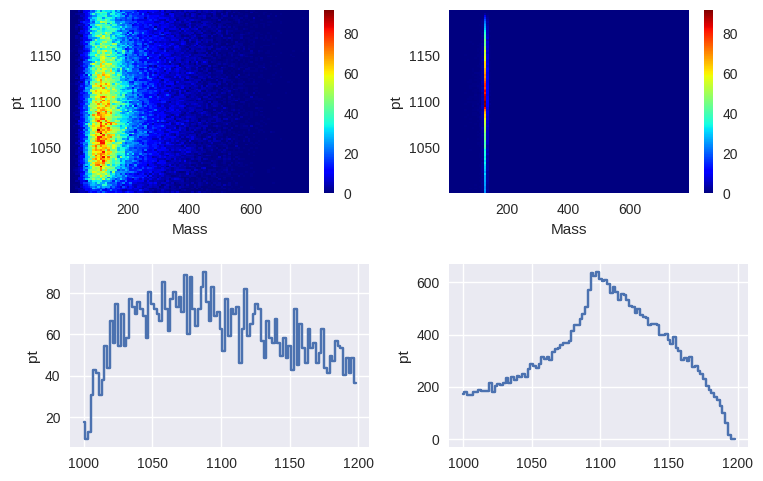

7.525789948544634
[1191.9974262]


In [245]:
fig, ax = plt.subplots(2, 2)
fig.tight_layout(pad=3)

y_var = 'pt'

index = 14
optimal_bins = 97

x_low = background_dict['mass'].min()
x_high = background_dict['mass'].max()

y_low = background_dict[y_var].min()
y_high = background_dict[y_var].max()

b = ax[0,0].hist2d(background_dict['mass'], background_dict[y_var], bins=(optimal_bins, 100), cmap=plt.cm.jet, range=([x_low, x_high], [y_low, y_high]))
plt.colorbar(b[3], ax=ax[0,0])

c = ax[0,1].hist2d(signal_dict['mass'], signal_dict[y_var], bins=(optimal_bins, 100), cmap=plt.cm.jet, range=([x_low, x_high], [y_low, y_high]))
plt.colorbar(b[3], ax=ax[0,1])

qcd_weight = (2000/2050) * (100000 / np.sum(c[0]))
higgs_weight = (50/2050) * (100000 / np.sum(b[0]))

ax[0,0].set_xlabel("Mass")
ax[0,0].set_ylabel(y_var)

ax[0,1].set_xlabel("Mass")
ax[0,1].set_ylabel(y_var)

bkg_slice = b[0][index]
higgs_slice = c[0][index]

bkg_weight = (2000/2050) * (100000 / np.sum(higgs_slice))
bkg_slice = bkg_slice*bkg_weight
x = np.linspace(b[2][0], b[2][-2], 100)
ax[1,0].step(x, bkg_slice, where='mid')
ax[1,0].set_ylabel(y_var)

higgs_weight = (50/2050) * (100000 / np.sum(bkg_slice))
higgs_slice = higgs_slice * higgs_weight
x = np.linspace(c[2][0], c[2][-2], 100)
ax[1,1].step(x, higgs_slice, where='mid')
ax[1,1].set_ylabel(y_var)

plt.show()

expected_sig = []
for i in range(len(bkg_slice)):
    qcd = bkg_slice[i] 
    higgs = higgs_slice[i] 
    prob = stats.poisson.cdf(qcd+higgs, qcd, loc=0)
    expected_sig.append(stats.norm.ppf(prob, loc=0, scale=1))

expected_sig = np.array(expected_sig)
expected_sig[np.isinf(expected_sig)] = 0

print(expected_sig.max())
print(b[2][np.where(expected_sig == expected_sig.max())])

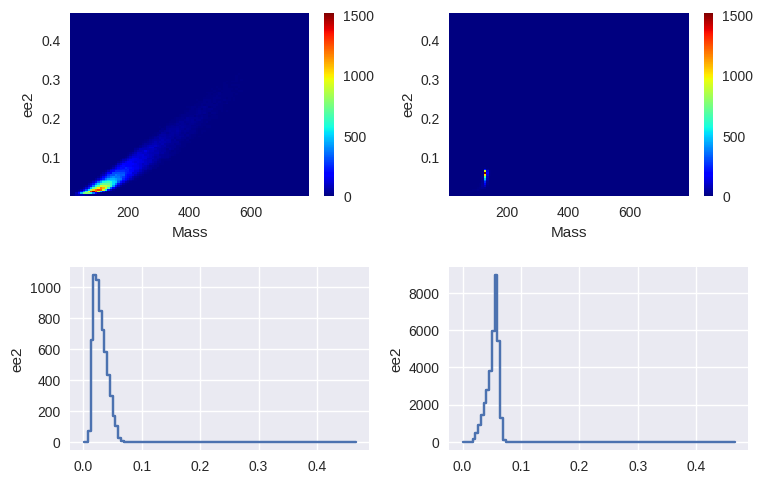

4.136479775117108
[0.0195198]


In [243]:
fig, ax = plt.subplots(2, 2)
fig.tight_layout(pad=3)

y_var = 'ee2'

index = 14
optimal_bins = 97

x_low = background_dict['mass'].min()
x_high = background_dict['mass'].max()

y_low = background_dict[y_var].min()
y_high = background_dict[y_var].max()

b = ax[0,0].hist2d(background_dict['mass'], background_dict[y_var], bins=(optimal_bins, 100), cmap=plt.cm.jet, range=([x_low, x_high], [y_low, y_high]))
plt.colorbar(b[3], ax=ax[0,0])

c = ax[0,1].hist2d(signal_dict['mass'], signal_dict[y_var], bins=(optimal_bins, 100), cmap=plt.cm.jet, range=([x_low, x_high], [y_low, y_high]))
plt.colorbar(b[3], ax=ax[0,1])

qcd_weight = (2000/2050) * (100000 / np.sum(c[0]))
higgs_weight = (50/2050) * (100000 / np.sum(b[0]))

ax[0,0].set_xlabel("Mass")
ax[0,0].set_ylabel(y_var)

ax[0,1].set_xlabel("Mass")
ax[0,1].set_ylabel(y_var)

bkg_slice = b[0][index]
higgs_slice = c[0][index]

bkg_weight = (2000/2050) * (100000 / np.sum(higgs_slice))
bkg_slice = bkg_slice*bkg_weight
x = np.linspace(b[2][0], b[2][-2], 100)
ax[1,0].step(x, bkg_slice, where='mid')
ax[1,0].set_ylabel(y_var)

higgs_weight = (50/2050) * (100000 / np.sum(bkg_slice))
higgs_slice = higgs_slice * higgs_weight
x = np.linspace(c[2][0], c[2][-2], 100)
ax[1,1].step(x, higgs_slice, where='mid')
ax[1,1].set_ylabel(y_var)

plt.show()

expected_sig = []
for i in range(len(bkg_slice)):
    qcd = bkg_slice[i] 
    higgs = higgs_slice[i] 
    prob = stats.poisson.cdf(qcd+higgs, qcd, loc=0)
    expected_sig.append(stats.norm.ppf(prob, loc=0, scale=1))

    
expected_sig = np.array(expected_sig)
expected_sig[np.isinf(expected_sig)] = 0

print(expected_sig.max())
print(b[2][np.where(expected_sig == expected_sig.max())])

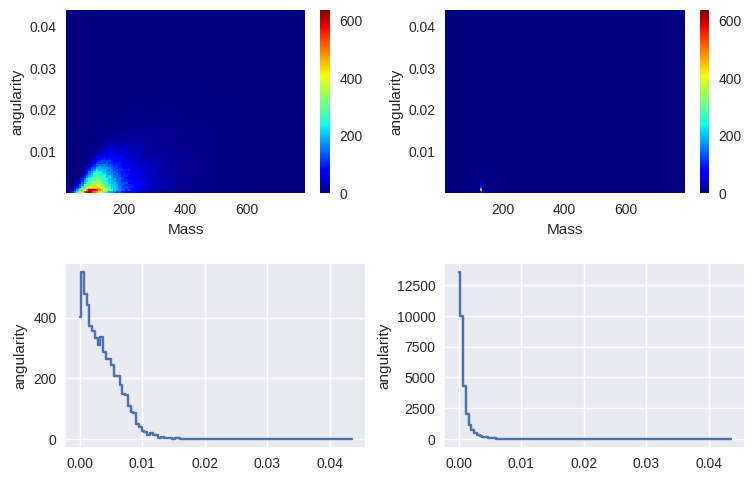

6.819447445167235
[0.00439763]


In [242]:
fig, ax = plt.subplots(2, 2)
fig.tight_layout(pad=3)

y_var = 'angularity'

index = 14
optimal_bins = 97

x_low = background_dict['mass'].min()
x_high = background_dict['mass'].max()

y_low = background_dict[y_var].min()
y_high = background_dict[y_var].max()

b = ax[0,0].hist2d(background_dict['mass'], background_dict[y_var], bins=(optimal_bins, 100), cmap=plt.cm.jet, range=([x_low, x_high], [y_low, y_high]))
plt.colorbar(b[3], ax=ax[0,0])

c = ax[0,1].hist2d(signal_dict['mass'], signal_dict[y_var], bins=(optimal_bins, 100), cmap=plt.cm.jet, range=([x_low, x_high], [y_low, y_high]))
plt.colorbar(b[3], ax=ax[0,1])

ax[0,0].set_xlabel("Mass")
ax[0,0].set_ylabel(y_var)

ax[0,1].set_xlabel("Mass")
ax[0,1].set_ylabel(y_var)

bkg_slice = b[0][index]
higgs_slice = c[0][index]

bkg_weight = (2000/2050) * (100000 / np.sum(higgs_slice))
bkg_slice = bkg_slice*bkg_weight
x = np.linspace(b[2][0], b[2][-2], 100)
ax[1,0].step(x, bkg_slice, where='mid')
ax[1,0].set_ylabel(y_var)

higgs_weight = (50/2050) * (100000 / np.sum(bkg_slice))
higgs_slice = higgs_slice * higgs_weight
x = np.linspace(c[2][0], c[2][-2], 100)
ax[1,1].step(x, higgs_slice, where='mid')
ax[1,1].set_ylabel(y_var)

plt.show()

expected_sig = []
for i in range(len(bkg_slice)):
    qcd = bkg_slice[i] 
    higgs = higgs_slice[i] 
    prob = stats.poisson.cdf(qcd+higgs, qcd, loc=0)
    expected_sig.append(stats.norm.ppf(prob, loc=0, scale=1))

expected_sig = np.array(expected_sig)
expected_sig[np.isinf(expected_sig)] = 0

print(expected_sig.max())
print(b[2][np.where(expected_sig == expected_sig.max())])

pt: expected sig 7.526
at 1191.997
--------
eta: expected sig 8.21
at -1.298
--------
phi: expected sig 0.0
at -3.142
--------
mass: expected sig 0.0
at 11.984
--------
ee2: expected sig 4.136
at 0.02
--------
ee3: expected sig 0.0
at 0.0
--------
d2: expected sig 1.793
at 10.236
--------
angularity: expected sig 6.819
at 0.004
--------
t1: expected sig 6.715
at 0.549
--------
t2: expected sig 7.009
at 0.681
--------
t3: expected sig 7.973
at 0.439
--------
t21: expected sig 6.991
at 0.686
--------
t32: expected sig 8.21
at 0.954
--------
KtDeltaR: expected sig 7.775
at 0.117
--------


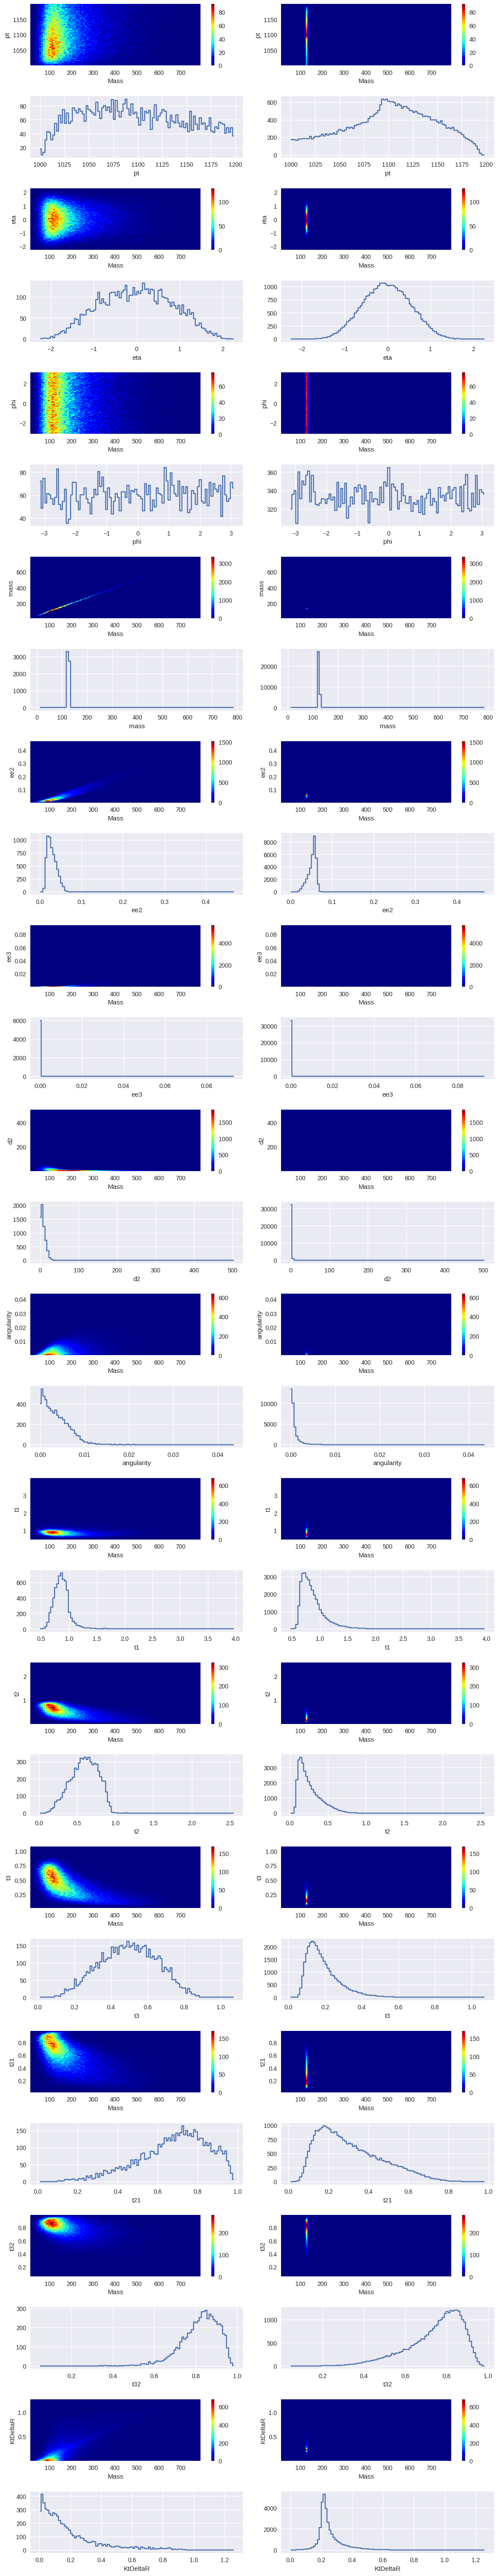

In [284]:
fig, ax = plt.subplots(len(keys)*2, 2, figsize=(12, 60))
fig.tight_layout(pad=3)

j = 0
k = 1
for key in keys:
    y_var = key

    index = 14
    optimal_bins = 97

    x_low = background_dict['mass'].min()
    x_high = background_dict['mass'].max()

    y_low = background_dict[y_var].min()
    y_high = background_dict[y_var].max()

    b = ax[j,0].hist2d(background_dict['mass'], background_dict[y_var], bins=(optimal_bins, 100), cmap=plt.cm.jet, range=([x_low, x_high], [y_low, y_high]))
    plt.colorbar(b[3], ax=ax[j,0])

    c = ax[j,1].hist2d(signal_dict['mass'], signal_dict[y_var], bins=(optimal_bins, 100), cmap=plt.cm.jet, range=([x_low, x_high], [y_low, y_high]))
    plt.colorbar(b[3], ax=ax[j,1])

    qcd_weight = (2000/2050) * (100000 / np.sum(c[0]))
    higgs_weight = (50/2050) * (100000 / np.sum(b[0]))

    ax[j,0].set_xlabel("Mass")
    ax[j,0].set_ylabel(y_var)

    ax[j,1].set_xlabel("Mass")
    ax[j,1].set_ylabel(y_var)

    bkg_slice = b[0][index]
    higgs_slice = c[0][index]

    bkg_weight = (2000/2050) * (100000 / np.sum(higgs_slice))
    bkg_slice = bkg_slice*bkg_weight
    x = np.linspace(b[2][0], b[2][-2], 100)
    ax[k,0].step(x, bkg_slice, where='mid')
    ax[k,0].set_xlabel(y_var)

    higgs_weight = (50/2050) * (100000 / np.sum(bkg_slice))
    higgs_slice = higgs_slice * higgs_weight
    x = np.linspace(c[2][0], c[2][-2], 100)
    ax[k,1].step(x, higgs_slice, where='mid')
    ax[k,1].set_xlabel(y_var)
    
    j = j+2
    k = k+2

    expected_sig = []
    for i in range(len(bkg_slice)):
        qcd = bkg_slice[i] 
        higgs = higgs_slice[i] 
        prob = stats.poisson.cdf(qcd+higgs, qcd, loc=0)
        expected_sig.append(stats.norm.ppf(prob, loc=0, scale=1))

    expected_sig = np.array(expected_sig)
    expected_sig[np.isinf(expected_sig)] = 0

    print(str(key)+": expected sig "+str(round(expected_sig.max(),3)))
    print("at "+str(round(b[2][np.where(expected_sig == expected_sig.max())][0],3)))
    print("--------")
    
plt.show()
    

In [ ]:
expected_sig = []
for i in range(bins):
    qcd = bkd_hist[0][i] 
    higgs = sig_hist[0][i] 
    prob = stats.poisson.cdf(qcd+higgs, qcd, loc=0)
    expected_sig.append(stats.norm.ppf(prob, loc=0, scale=1))

expected_sig = np.array(expected_sig)
expected_sig[np.isinf(expected_sig)] = 0

expected_sig

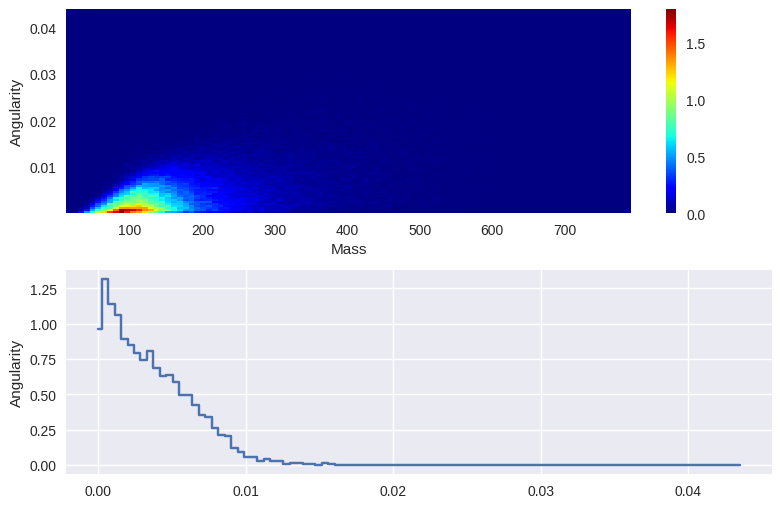

In [120]:
fig, ax = plt.subplots(2, 1)
fig.tight_layout(pad=2)

index = 14
optimal_bins = 97

b = ax[0].hist2d(background_dict['mass'], background_dict['angularity'], bins=(optimal_bins, 100), cmap=plt.cm.jet, density=True)
plt.colorbar(b[3], ax=ax[0])

ax[0].set_xlabel("Mass")
ax[0].set_ylabel("Angularity")
# ax[0].set_title("Stacked histogram with optimal bin size: Mass")

plt_slice = b[0][index]
plt_slice
x = np.linspace(b[2][0], b[2][-2], 100)
ax[1].step(x, plt_slice, where='mid')
ax[1].set_ylabel("Angularity")

plt.show()

In [93]:
np.array([50]*len(signal_dict['pt']))

array([50, 50, 50, ..., 50, 50, 50])

In [72]:
b[2]

array([1000.00007201, 1002.02024619, 1004.04042037, 1006.06059455,
       1008.08076873, 1010.10094291, 1012.1211171 , 1014.14129128,
       1016.16146546, 1018.18163964, 1020.20181382, 1022.221988  ,
       1024.24216218, 1026.26233636, 1028.28251055, 1030.30268473,
       1032.32285891, 1034.34303309, 1036.36320727, 1038.38338145,
       1040.40355563, 1042.42372982, 1044.443904  , 1046.46407818,
       1048.48425236, 1050.50442654, 1052.52460072, 1054.5447749 ,
       1056.56494908, 1058.58512327, 1060.60529745, 1062.62547163,
       1064.64564581, 1066.66581999, 1068.68599417, 1070.70616835,
       1072.72634254, 1074.74651672, 1076.7666909 , 1078.78686508,
       1080.80703926, 1082.82721344, 1084.84738762, 1086.8675618 ,
       1088.88773599, 1090.90791017, 1092.92808435, 1094.94825853,
       1096.96843271, 1098.98860689, 1101.00878107, 1103.02895526,
       1105.04912944, 1107.06930362, 1109.0894778 , 1111.10965198,
       1113.12982616, 1115.15000034, 1117.17017452, 1119.19034